## Modelado y entrenamiento de modelos de aprendizaje automatico

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.options.display.max_rows = 200

Importamos el dataset curado en las etapas anteriores con la intención de predecir el caudal del río Santa Rosa de Calamuchita (Córdoba) con una anticipación de 6 horas.

In [2]:
df = pd.read_csv('santa_rosa_meteo.csv', parse_dates=True, index_col=0)
df.drop(columns=['Codigo','dia','mes','anio'], inplace=True)
df.head(100)

,Temperatura_[Celsius]_x,HumedadRel_[porc],Presion_[hPa],DireccionViento_[grad],VelocidadViento_[KpH]_x,RadiacionSolar_[WpM2],Lluvia_[mm],RafagaViento_[KpH],SenialGPRS_[ASU],NivelBateria_[V]
2018-08-15 13:00:00,18.610000,23.040000,945.625000,90.0,3.158330,454.2795,0.0,6.970450,5.500000,12.793650
2018-08-15 13:30:00,18.170000,23.716667,946.458333,127.5,5.216943,663.5760,4.0,15.510000,6.000000,13.158733
2018-08-15 14:00:00,18.826667,22.263333,944.791667,67.5,4.606737,644.9290,0.0,14.504167,6.000000,13.172933
2018-08-15 14:30:00,19.026667,22.583333,943.958333,90.0,4.526270,593.4890,0.0,12.566257,6.000000,13.215467
2018-08-15 15:00:00,19.150000,21.816667,943.958333,90.0,0.000000,599.2760,0.0,0.000000,6.000000,13.229633
2018-08-15 15:30:00,18.890000,22.536667,944.583333,90.0,0.000000,398.0170,0.0,0.000000,6.000000,13.215433
2018-08-15 16:00:00,19.143333,22.780000,944.375000,75.0,4.499450,378.7270,0.0,15.328967,6.000000,13.236700
2018-08-15 16:30:00,19.243333,22.643333,944.583333,75.0,6.115493,357.5080,4.2,15.610600,6.000000,13.094933
2018-08-15 17:00:00,18.730000,23.553333,944.583333,75.0,6.155723,309.9260,0.0,19.204767,6.000000,13.045267
2018-08-15 17:30:00,18.056667,24.193333,944.375000,60.0,5.505283,137.6020,0.0,13.397747,6.000000,13.123300


Incorporamos los datos de caudales y los sampleamos cada 30 minutos, para luego mergear con el resto del dataset y asi preparar el "lag" deseado: E.e. dato que la información contenida en el dataset (tal como fue contruido hasta el momento) representa un punto t en el tiempo por cada línea nos interesa disponerla de tal forma que en cada línea tambien se anote la información correspondiente a los puntos en el tiempo t-1,...,t-n.

In [3]:
caudales = pd.read_csv('./dataset/Datos_Caudales/RioSantaRosa.csv', index_col='date_time', parse_dates=True)
caudales_resampled = caudales.resample('30T').sum()
caudales_resampled.head()

,Caudal_m3/s
date_time,
2018-11-20 16:00:00,2.252353
2018-11-20 16:30:00,7.344448
2018-11-20 17:00:00,6.160122
2018-11-20 17:30:00,4.600502
2018-11-20 18:00:00,6.258754


In [4]:
df_complete = df.merge(caudales_resampled, left_index=True, right_index=True, how='inner')
df_complete.head()

,Temperatura_[Celsius]_x,HumedadRel_[porc],Presion_[hPa],DireccionViento_[grad],VelocidadViento_[KpH]_x,RadiacionSolar_[WpM2],Lluvia_[mm],RafagaViento_[KpH],SenialGPRS_[ASU],NivelBateria_[V],Caudal_m3/s
2018-11-20 16:00:00,34.413333,26.690000,932.708333,120.0,5.666220,812.752,0.0,21.638900,6.0,13.314700,2.252353
2018-11-20 16:30:00,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448
2018-11-20 17:00:00,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122
2018-11-20 17:30:00,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502
2018-11-20 18:00:00,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754


In [5]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [6]:
df_supervised = series_to_supervised(df_complete, n_in=24, n_out=1)
df_supervised.head()

,var1(t-24),var2(t-24),var3(t-24),var4(t-24),var5(t-24),var6(t-24),var7(t-24),var8(t-24),var9(t-24),var10(t-24),var11(t-24),var1(t-23),var2(t-23),var3(t-23),var4(t-23),var5(t-23),var6(t-23),var7(t-23),var8(t-23),var9(t-23),var10(t-23),var11(t-23),var1(t-22),var2(t-22),var3(t-22),var4(t-22),var5(t-22),var6(t-22),var7(t-22),var8(t-22),var9(t-22),var10(t-22),var11(t-22),var1(t-21),var2(t-21),var3(t-21),var4(t-21),var5(t-21),var6(t-21),var7(t-21),var8(t-21),var9(t-21),var10(t-21),var11(t-21),var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var7(t-20),var8(t-20),var9(t-20),var10(t-20),var11(t-20),var1(t-19),var2(t-19),var3(t-19),var4(t-19),var5(t-19),var6(t-19),var7(t-19),var8(t-19),var9(t-19),var10(t-19),var11(t-19),var1(t-18),var2(t-18),var3(t-18),var4(t-18),var5(t-18),var6(t-18),var7(t-18),var8(t-18),var9(t-18),var10(t-18),var11(t-18),var1(t-17),var2(t-17),var3(t-17),var4(t-17),var5(t-17),var6(t-17),var7(t-17),var8(t-17),var9(t-17),var10(t-17),var11(t-17),var1(t-16),var2(t-16),var3(t-16),var4(t-16),var5(t-16),var6(t-16),var7(t-16),var8(t-16),var9(t-16),var10(t-16),var11(t-16),var1(t-15),...,var11(t-9),var1(t-8),var2(t-8),var3(t-8),var4(t-8),var5(t-8),var6(t-8),var7(t-8),var8(t-8),var9(t-8),var10(t-8),var11(t-8),var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var8(t-7),var9(t-7),var10(t-7),var11(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var9(t-6),var10(t-6),var11(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),var11(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t)
2018-11-21 04:00:00,34.413333,26.690000,932.708333,120.0,5.666220,812.752,0.0,21.638900,6.0,13.314700,2.252353,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754,32.590000,27.200000,932.083333,82.5,5.646103,250.127,0.0,18.782333,6.0,13.130400,4.353730,30.940000,29.730000,932.708333,82.5,6.940280,134.387,0.0,20.452033,6.0,13.073633,7.087714,29.390000,30.840000,932.500000,75.0,4.794493,30.864,0.0,16.911467,6.0,13.009833,7.529703,27.926667,32.213333,932.708333,75.0,3.667953,0.0,0.0,9.474997,6.0,12.9673,5.404183,26.470000,...,2.546415,19.716667,57.730000,934.583333,75.0,1.253943,0.0,0.0,3.587487,6.0,12.8326,1.948242,19.880000,56.980000,934.375000,172.5,1.300883,0.0,0.0,4.090407,6.0,12.8255,2.384228,18.730000,63.516667,934.375000,240.0,1.763570,0.0,0.0,4.452507,6.0,12.8113,0.000000,17.503333,69.456667,934.166667,292.5,1.381349,0.0,0.0,1.964734,6.0,12.8042,2.464787,16.093333,76.266667,933.750000,292.5,0.958897,0.0,0.0,2.749290,6.0,12.7830,7.451393,15.356667,80.320000,933.125000,202.5,1.052777,0.0,0.0,2.957160,6.0,12.775900,0.000000,15.403333,81.736667,933.333333,22.5,0.710791,0.0,0.0,1.971441,6.0,12.761700,8.128753,15.660000,79.086667,933.958333,210.0,2.729170,0.0,0.0,8.918433,6.0,12.761700,2.912305,16.516667,73.643333,932.500000,270.0,2.259780,0.0,0.0,5.773507,6.0,12.754600,0.000000
2018-11-21 04:30:00,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,1

Definimos el target set y el train set

In [11]:
train = df_supervised.loc[:,:'var11(t-13)']
target = df_supervised.iloc[:,-1]
print(train.shape, target.shape)

(12760, 132) (12760,)


In [12]:
train.head()

,var1(t-24),var2(t-24),var3(t-24),var4(t-24),var5(t-24),var6(t-24),var7(t-24),var8(t-24),var9(t-24),var10(t-24),var11(t-24),var1(t-23),var2(t-23),var3(t-23),var4(t-23),var5(t-23),var6(t-23),var7(t-23),var8(t-23),var9(t-23),var10(t-23),var11(t-23),var1(t-22),var2(t-22),var3(t-22),var4(t-22),var5(t-22),var6(t-22),var7(t-22),var8(t-22),var9(t-22),var10(t-22),var11(t-22),var1(t-21),var2(t-21),var3(t-21),var4(t-21),var5(t-21),var6(t-21),var7(t-21),var8(t-21),var9(t-21),var10(t-21),var11(t-21),var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var7(t-20),var8(t-20),var9(t-20),var10(t-20),var11(t-20),var1(t-19),var2(t-19),var3(t-19),var4(t-19),var5(t-19),var6(t-19),var7(t-19),var8(t-19),var9(t-19),var10(t-19),var11(t-19),var1(t-18),var2(t-18),var3(t-18),var4(t-18),var5(t-18),var6(t-18),var7(t-18),var8(t-18),var9(t-18),var10(t-18),var11(t-18),var1(t-17),var2(t-17),var3(t-17),var4(t-17),var5(t-17),var6(t-17),var7(t-17),var8(t-17),var9(t-17),var10(t-17),var11(t-17),var1(t-16),var2(t-16),var3(t-16),var4(t-16),var5(t-16),var6(t-16),var7(t-16),var8(t-16),var9(t-16),var10(t-16),var11(t-16),var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var7(t-15),var8(t-15),var9(t-15),var10(t-15),var11(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),var5(t-14),var6(t-14),var7(t-14),var8(t-14),var9(t-14),var10(t-14),var11(t-14),var1(t-13),var2(t-13),var3(t-13),var4(t-13),var5(t-13),var6(t-13),var7(t-13),var8(t-13),var9(t-13),var10(t-13),var11(t-13)
2018-11-21 04:00:00,34.413333,26.690000,932.708333,120.0,5.666220,812.752,0.0,21.638900,6.0,13.314700,2.252353,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754,32.590000,27.200000,932.083333,82.5,5.646103,250.127,0.0,18.782333,6.0,13.130400,4.353730,30.940000,29.730000,932.708333,82.5,6.940280,134.387,0.0,20.452033,6.0,13.073633,7.087714,29.390000,30.840000,932.500000,75.0,4.794493,30.864,0.0,16.911467,6.0,13.009833,7.529703,27.926667,32.213333,932.708333,75.0,3.667953,0.0,0.0,9.474997,6.0,12.9673,5.404183,26.470000,36.110000,934.166667,67.5,0.891843,0.0,0.0,4.170873,6.0,12.9531,6.725226,23.286667,48.096667,934.166667,67.5,1.696513,0.0,0.0,2.460950,6.0,12.924800,7.427871,20.456667,59.490000,934.791667,67.5,1.207006,0.0,0.0,2.668823,6.0,12.903500,6.937931
2018-11-21 04:30:00,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754,32.590000,27.200000,932.083333,82.5,5.646103,250.127,0.0,18.782333,6.0,13.130400,4.353730,30.940000,29.730000,932.708333,82.5,6.940280,134.387,0.0,20.452033,6.0,13.073633,7.087714,29.390000,30.840000,932.500000,75.0,4.794493,30.864,0.0,16.911467,6.0,13.009833,7.529703,27.926667,32.213333,932.708333,75.0,3.667953,0.000,0.0,9.474997,6.0,12.967300,5.404183,26.470000,36.110000,934.166667,67.5,0.891843,0.0,0.0,4.170873,6.0,12.9531,6.725226,23.286667,48.096667,934.166667,67.5,1.696513,0.0,0.0,2.460950,6.0,12.9248,7.427871,20.456667,59.490000,934.791667,67.5,1.207006,0.0,0.0,2.668823,6.0,12.903500,6.937931,18.676667,66.186667,934.375000,75.0,1.978147,0.0,0.0,3.795360,6.0,12.889300,4.149980
2018-11-21 05:00:00,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754,32.590000,27.200000,932.083333,82.5,5.646103,250.127,0.0,18.782333,6.0,13.130400,4.35

Armamos set de entrenamiento y de testeo.
Posteriormente tambien dividimos el set de entrenamiento en entrenamiento y validacion.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_supervised, target)

In [14]:
X_train_v, X_valid, y_train_v, y_valid = train_test_split(X_train, y_train)

### Random Forest

Primero intentamos predecir con un modelo de regresion simple pero eficaz, el Random Forest Regressor.
    En nuestra primera iteracion dejamos los paramentros por defecto. Entrenamos con con conjunto de entrenamiento reductivo y predecimos con el conjunto de validacion.

In [15]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=17, n_jobs=6)
random_forest.fit(X_train_v, y_train_v)
predictions_random_forest = random_forest.predict(X_valid)

In [16]:
predictions_random_forest

array([0.        , 0.02941712, 0.        , ..., 0.        , 0.23795302,
       0.        ])

In [18]:
random_forest_score = random_forest.score(X_valid, y_valid)
random_forest_score

0.8788628066340768

In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores_r2 = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='r2')
scores_r2

array([0.97183014, 0.85627545, 0.99867806, 0.99043784, 0.99558073])

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
(-scores)

array([ 5.10989155, 14.73131689,  0.92760612,  3.08699321,  1.90999069])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.671194 to fit



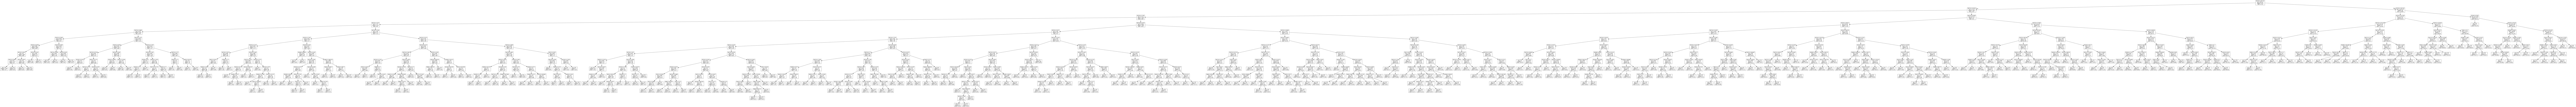

In [104]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

dot_data = StringIO()
export_graphviz(random_forest.estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [105]:
random_forest.feature_importances_

array([5.77165481e-06, 2.61401006e-04, 3.94140129e-05, 2.39643023e-05,
       3.87351326e-05, 1.16092468e-05, 2.69751886e-06, 3.58563790e-05,
       5.02290565e-04, 6.98509908e-05, 5.31413490e-05, 1.03935817e-06,
       2.03349544e-05, 2.37188287e-04, 5.15335166e-04, 6.23701022e-05,
       8.70096657e-07, 3.11742043e-04, 1.93568550e-05, 2.35679609e-07,
       3.00657662e-05, 7.30694620e-06, 1.08723556e-06, 1.79851784e-05,
       4.43019485e-04, 3.31377068e-06, 2.17740144e-05, 3.80628313e-07,
       3.20299474e-04, 2.23515205e-05, 3.32035628e-04, 9.92132370e-06,
       4.80589993e-06, 8.84497830e-06, 1.26320251e-06, 7.42701773e-05,
       3.06865842e-04, 5.72151195e-04, 5.72522052e-06, 2.78808401e-03,
       8.22474673e-05, 1.46798342e-07, 1.30704647e-05, 6.08587327e-06,
       4.34354817e-06, 2.40220854e-06, 1.64560986e-06, 1.11575516e-05,
       2.98142583e-04, 1.13303623e-06, 1.88385610e-05, 1.01738916e-05,
       3.43763680e-04, 7.92910461e-06, 1.53448136e-05, 1.93847797e-06,
      

### RF - features recortados

In [21]:
from sklearn.ensemble import RandomForestRegressor

random_forest_max_features = RandomForestRegressor(random_state=17, n_jobs=6, max_features='sqrt')
random_forest_max_features.fit(X_train_v, y_train_v)
predictions_random_forest_max_features = random_forest_max_features.predict(X_valid)

In [22]:
predictions_random_forest_max_features

array([1.39972423e+00, 3.72595464e-02, 1.89135832e-07, ...,
       1.89135832e-07, 2.03302876e-01, 1.47210766e-04])

In [23]:
random_forest_score_max_features = random_forest_max_features.score(X_valid, y_valid)
random_forest_score_max_features

0.5899801205718608

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores_r2 = cross_val_score(random_forest_max_features, X_train, y_train, cv=5, scoring='r2')
scores_r2

array([0.72317312, 0.56375102, 0.92197484, 0.85335537, 0.82058565])

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(random_forest_max_features, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
(-scores)

array([16.0185601 , 25.66512028,  7.12647294, 12.08901297, 12.16982472])

### Normalizacion y PCA

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(train))
df_scaled.index = train.index

In [40]:
df_scaled.dropna(inplace=True)
df_scaled.shape

(12760, 132)

In [41]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131
2018-11-21 04:00:00,0.870826,0.214367,0.373684,0.355556,0.336519,0.645227,0.0,0.425613,0.175824,0.833327,0.002005,0.869803,0.196292,0.384211,0.200000,0.391079,0.542113,0.0,0.460565,0.175824,0.814397,0.006539,0.860671,0.194435,0.357895,0.200000,0.466348,0.478305,0.0,0.518728,0.175824,0.825741,0.005485,0.852707,0.186040,0.347368,0.266667,0.376742,0.376723,0.0,0.330916,0.175824,0.814397,0.004096,0.843720,0.185111,0.368421,0.266667,0.412186,0.297090,0.0,0.451992,0.175824,0.803035,0.005573,0.830861,0.219833,0.357895,0.244444,0.335324,0.198571,0.0,0.369427,0.175824,0.734863,0.003877,0.794696,0.246946,0.373684,0.244444,0.412186,0.106687,0.0,0.402269,0.175824,0.704534,0.006311,0.760722,0.258841,0.368421,0.222222,0.284747,0.024502,0.0,0.332630,0.175824,0.670448,0.006704,0.728648,0.273559,0.373684,0.222222,0.217841,0.000000,0.0,0.186363,0.175824,0.647724,0.004812,0.696720,0.315318,0.410526,0.200000,0.052967,0.000000,0.0,0.082036,0.175824,0.640137,0.005988,0.626945,0.443774,0.410526,0.200000,0.100757,0.000000,0.0,0.048404,0.175824,0.625018,0.006614,0.564916,0.565871,0.426316,0.200000,0.071685,0.000000,0.0,0.052493,0.175824,0.613638,0.006177
2018-11-21 04:30:00,0.869803,0.196292,0.384211,0.200000,0.391079,0.542113,0.0,0.460565,0.175824,0.814397,0.006539,0.860671,0.194435,0.357895,0.200000,0.466348,0.478305,0.0,0.518728,0.175824,0.825741,0.005485,0.852707,0.186040,0.347368,0.266667,0.376742,0.376723,0.0,0.330916,0.175824,0.814397,0.004096,0.843720,0.185111,0.368421,0.266667,0.412186,0.297090,0.0,0.451992,0.175824,0.803035,0.005573,0.830861,0.219833,0.357895,0.244444,0.335324,0.198571,0.0,0.369427,0.175824,0.734863,0.003877,0.794696,0.246946,0.373684,0.244444,0.412186,0.106687,0.0,0.402269,0.175824,0.704534,0.006311,0.760722,0.258841,0.368421,0.222222,0.284747,0.024502,0.0,0.332630,0.175824,0.670448,0.006704,0.728648,0.273559,0.373684,0.222222,0.217841,0.000000,0.0,0.186363,0.175824,0.647724,0.004812,0.696720,0.315318,0.410526,0.200000,0.052967,0.000000,0.0,0.082036,0.175824,0.640137,0.005988,0.626945,0.443774,0.410526,0.200000,0.100757,0.000000,0.0,0.048404,0.175824,0.625018,0.006614,0.564916,0.565871,0.426316,0.200000,0.071685,0.000000,0.0,0.052493,0.175824,0.613638,0.006177,0.525900,0.637637,0.415789,0.222222,0.117483,0.000000,0.0,0.074650,0.175824,0.606051,0.003695
2018-11-21 05:00:00,0.860671,0.194435,0.357895,0.200000,0.466348,0.478305,0.0,0.518728,0.175824,0.825741,0.005485,0.852707,0.186040,0.347368,0.266667,0.376742,0.376723,0.0,0.330916,0.175824,0.814397,0.004096,0.843720,0.185111,0.368421,0.266667,0.412186,0.297090,0.0,0.451992,0.175824,0.803035,0.005573,0.830861,0.219833,0.357895,0.244444,0.335324,0.198571,0.0,0.369427,0.175824,0.734863,0.003877,0.794696,0.246946,0.373684,0.244444,0.412186,0.106687,0.0,0.402269,0.175824,0.704534,0.006311,0.760722,0.258841,0.368421,0.222222,0.284747,0.024502,0.0,0.332630,0.175824,0.670448,0.006704,0.728648,0.273559,0.373684,0.222222,0.217841,0.000000,0.0,0.186363,0.175824,0.647724,0.004812,0.696720,0.315318,0.410526,0.200000,0.052967,0.000000,0.0,0.082036,0.175824,0.640137,0.005988,0.626945,0.443774,0.410526,0.200000,0.100757,0.000000,0.0,0.048404,0.175824,0.625018,0.006614,0.564916,0.565871,0.426316,0.200000,0.071685,0.000000,0.0,0.052493,0.175824,0.613638,0.006177,0.525900,0.637637,0.415789,0.222222,0.117483,0.000000,0.0,0.074650,0.175824,0.606051,0.003695,0.536641,0.563121,0.415789,0.488889,0.089606,0.000000,0.0,0.082432,0.175824,0.594672,0.000000
2018-11-21 05:30:00,0.852707,0.186040,0.347368,0.266667,0.376742,0.376723,0.0,0.330916,0.175824,0.814397,0.004096,0.843720,0.185111,0.368

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)

In [43]:
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

In [44]:
df_pca.index = df_scaled.index
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2018-11-21 04:00:00,1.983171,-1.356321,-0.009112,-0.144131,0.417498,-0.120110,-0.115108,-0.136037,0.225733,0.079365,-0.182466,0.128029,-0.261360
2018-11-21 04:30:00,1.706618,-1.458509,0.018472,-0.190960,0.430073,-0.064884,-0.241902,-0.149678,0.234736,0.017039,-0.222815,0.069092,-0.221731
2018-11-21 05:00:00,1.426651,-1.476369,-0.008117,-0.183067,0.413565,0.033056,-0.348395,-0.001241,0.234615,-0.056343,-0.138362,0.114251,-0.246917
2018-11-21 05:30:00,1.152407,-1.409315,-0.051829,-0.161283,0.355437,0.195774,-0.435181,0.185964,0.224562,-0.134944,-0.064517,0.174999,-0.237319
2018-11-21 06:00:00,0.894262,-1.346485,-0.121797,-0.094519,0.236784,0.427388,-0.471398,0.362851,0.230960,-0.221617,-0.066202,0.178847,-0.220921


In [45]:
pca.n_components_

13

In [46]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, target)

In [47]:
X_train_pca_v, X_valid_pca, y_train_pca_v, y_valid_pca = train_test_split(X_train, y_train)

#### PCA & RANDOM FOREST

In [48]:
random_forest_pca = RandomForestRegressor(random_state=17, n_jobs=6)
random_forest_pca.fit(X_train_pca_v, y_train_pca_v)
predictions_random_forest_pca = random_forest.predict(X_valid_pca)

In [49]:
random_forest_pca_score = random_forest_pca.score(X_valid_pca, y_valid_pca)
random_forest_pca_score

0.9844094760948787

In [55]:
scores_r2 = cross_val_score(random_forest_pca, X_train_pca, y_train_pca, cv=5, scoring='r2')
scores_r2

array([0.4485    , 0.58023337, 0.25669436, 0.49884296, 0.59071155])

In [56]:
scores = cross_val_score(random_forest_pca, X_train_pca, y_train_pca, cv=5, scoring='neg_root_mean_squared_error')
(-scores)

array([20.54783849, 15.49719647, 31.20853103, 20.77997549, 17.00763217])

### Redes Neuronales

In [57]:
import pandas as pd
import numpy
import numpy as np
from numpy import concatenate
import matplotlib.pyplot as plt
from pandas import datetime
import datetime as dt  # Python standard library datetime  module

import math
from math import sqrt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dropout
from keras.callbacks import Callback

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

/home/horacio/anaconda3/envs/diplo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/horacio/anaconda3/envs/diplo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/horacio/anaconda3/envs/diplo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/horacio/anaconda3/envs/diplo/lib/python3

In [65]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(train))
df_scaled.index = train.index

In [81]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(df_scaled, target)

In [82]:
train_X2 = X_train_nn.values.reshape((X_train_nn.shape[0], 1, X_train_nn.shape[1]))
test_X2 = X_test_nn.values.reshape((X_test_nn.shape[0], 1, X_test_nn.shape[1]))
print(train_X2.shape, y_train_nn.shape, test_X2.shape, y_test_nn.shape)

(9570, 1, 132) (9570,) (3190, 1, 132) (3190,)


### Network Design

In [83]:
model2 = Sequential()
model2.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2]), activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')

In [84]:
history2 = model2.fit(train_X2, y_train_nn, epochs=100, batch_size=25, validation_data=(test_X2, y_test_nn), verbose=2, shuffle=False)

Train on 9570 samples, validate on 3190 samples
Epoch 1/100
9570/9570 - 1s - loss: 805.9060 - val_loss: 1205.9085
Epoch 2/100
9570/9570 - 1s - loss: 732.1765 - val_loss: 1149.6110
Epoch 3/100
9570/9570 - 1s - loss: 649.6506 - val_loss: 1079.2210
Epoch 4/100
9570/9570 - 1s - loss: 581.3762 - val_loss: 1025.1589
Epoch 5/100
9570/9570 - 1s - loss: 540.8308 - val_loss: 993.8452
Epoch 6/100
9570/9570 - 1s - loss: 517.6920 - val_loss: 975.2800
Epoch 7/100
9570/9570 - 1s - loss: 502.2824 - val_loss: 961.1030
Epoch 8/100
9570/9570 - 1s - loss: 489.9570 - val_loss: 950.2807
Epoch 9/100
9570/9570 - 1s - loss: 479.1036 - val_loss: 940.6412
Epoch 10/100
9570/9570 - 1s - loss: 469.1186 - val_loss: 932.0606
Epoch 11/100
9570/9570 - 1s - loss: 459.8755 - val_loss: 923.6619
Epoch 12/100
9570/9570 - 1s - loss: 451.3663 - val_loss: 915.7730
Epoch 13/100
9570/9570 - 1s - loss: 443.0415 - val_loss: 908.7235
Epoch 14/100
9570/9570 - 1s - loss: 435.5814 - val_loss: 901.7588
Epoch 15/100
9570/9570 - 1s - los

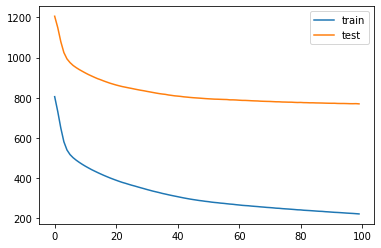

In [86]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

##### Neural networks with no normalization

In [93]:
train_X3 = X_train_v.values.reshape((X_train_v.shape[0], 1, X_train_v.shape[1]))
test_X3 = X_valid.values.reshape((X_valid.shape[0], 1, X_valid.shape[1]))
print(train_X2.shape, y_train_nn.shape, test_X2.shape, y_test_nn.shape)

(9570, 1, 132) (9570,) (3190, 1, 132) (3190,)


In [96]:
model2 = Sequential()
model2.add(LSTM(50, input_shape=(train_X3.shape[1], train_X3.shape[2]), activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')

In [97]:
history2 = model2.fit(train_X3, y_train_v, epochs=100, batch_size=25, validation_data=(test_X3, y_valid), verbose=2, shuffle=False)

Train on 7177 samples, validate on 2393 samples
Epoch 1/100
7177/7177 - 2s - loss: 1134.1846 - val_loss: 906.4140
Epoch 2/100
7177/7177 - 1s - loss: 540.1961 - val_loss: 830.4632
Epoch 3/100
7177/7177 - 1s - loss: 447.5365 - val_loss: 753.1155
Epoch 4/100
7177/7177 - 1s - loss: 384.2122 - val_loss: 675.4639
Epoch 5/100
7177/7177 - 1s - loss: 316.6993 - val_loss: 761.2502
Epoch 6/100
7177/7177 - 1s - loss: 274.0092 - val_loss: 610.4205
Epoch 7/100
7177/7177 - 1s - loss: 225.9009 - val_loss: 475.8460
Epoch 8/100
7177/7177 - 1s - loss: 194.4230 - val_loss: 461.2492
Epoch 9/100
7177/7177 - 1s - loss: 170.7202 - val_loss: 469.6812
Epoch 10/100
7177/7177 - 1s - loss: 154.1040 - val_loss: 459.8409
Epoch 11/100
7177/7177 - 1s - loss: 139.6476 - val_loss: 428.1340
Epoch 12/100
7177/7177 - 1s - loss: 126.3623 - val_loss: 397.8301
Epoch 13/100
7177/7177 - 1s - loss: 112.6178 - val_loss: 405.4151
Epoch 14/100
7177/7177 - 1s - loss: 105.2241 - val_loss: 412.4299
Epoch 15/100
7177/7177 - 1s - loss: 

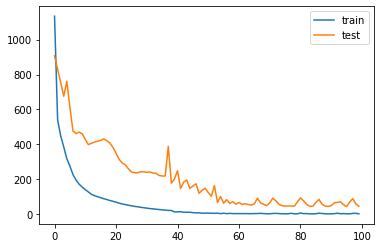

In [98]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [99]:
yhat2 = model2.predict(test_X3)
test_X2 = test_X3.reshape((test_X3.shape[0], test_X3.shape[2]))

In [64]:
inv_yhat2 = scaler.inverse_transform(test_X3)
inv_yhat2 = inv_yhat2[:,-1]

ValueError: operands could not be broadcast together with shapes (2393,275) (132,) (2393,275) 

In [100]:
df_inv_y2 = pd.DataFrame(data=inv_y2,index=graf_testY.index,columns=['inv_y2'])
df_inv_yhat2 = pd.DataFrame(data=inv_yhat2,index=graf_testY.index,columns=['inv_yhat2'])

fig, ax = plt.subplots(1,1, figsize=(15,6))

# x axis to plot both runoff and precip. against
x = df_inv_y2.index

ax.plot(x, df_inv_y2, color="blue", label='Observed Discharge')
ax.plot(x, df_inv_yhat2,color='black', label='Predicted Discharge')

# Create second axes, in order to get the bars from the top you can multiply 
# by -1
ax2 = ax.twinx()
graf_lluvia = raw['Lluvia_[mm]'][:2240]
ax2.bar(x, -graf_lluvia, color="gray", label='Rain')
#ax2.bar(x, -df_snow['snow'], color="red", label='Snow')

# Now need to fix the axis labels
max_pre = np.int(np.trunc(max(graf_lluvia))+30)
y2_ticks = np.linspace(0, max_pre, max_pre+1)
y2_ticklabels = [str(i) for i in y2_ticks]
ax2.set_yticks(-1 * y2_ticks)
ax2.set_yticklabels(y2_ticklabels)

handles2, labels2 = ax2.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()
ax2.legend(handles2 + handles, labels2 + labels, loc='upper left', frameon=False)

ax.set_ylim([0,200])
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Discharge [cmps]', fontsize=14)
ax2.set_ylabel('Precipitation [mm]', fontsize=14)

plt.title('LSTM-ANN Results',fontsize=20, color = 'black')

plt.show()

NameError: name 'inv_y2' is not defined